# Embeddings

Um embedding (ou vetorização) é uma forma de representar informações em um formato numérico (geralmente um vetor) de maneira que características ou propriedades importantes sejam preservadas, facilitando o processamento dessas informações por algoritmos de machine learning ou redes neurais. Os algoritmos de embedding podem ser classificados como parte do campo da Inteligência Artificial (IA), mais especificamente dentro do subcampo de aprendizado de máquina (Machine Learning). Isso ocorre porque embeddings geralmente são gerados por modelos treinados para capturar padrões ou características importantes em dados complexos, como texto, imagens ou interações de usuários.

## Setup

In [39]:
import os
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings

#Cálculo da similaridade do cosseno
from numpy import dot, array 
from numpy.linalg import norm

#Reduzir dimensionalidade dos vetores
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import yaml

with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
os.environ['OPENAI_API_KEY'] = config['OPENAI_API_KEY']

# Embeddings

In [40]:
documents = [
    "Este é o primeiro documento. Ele contém informações importantes sobre o projeto.",
    "Este é o segundo documento. Ele contém informações importantes sobre o projeto.",
    "O terceiro documento oferece uma visão geral dos resultados esperados e métricas de sucesso."
]

### Dividir em chunks

In [41]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=50, # Era 1000
    chunk_overlap=10, # Era 100
    length_function=len
)

chunks = text_splitter.create_documents(documents)

print('Chunks gerados:')
for i, chunk in enumerate(chunks):
    print(f'Chunk {i+1}: {chunk.page_content}')

Chunks gerados:
Chunk 1: Este é o primeiro documento. Ele contém
Chunk 2: contém informações importantes sobre o projeto.
Chunk 3: Este é o segundo documento. Ele contém informações
Chunk 4: importantes sobre o projeto.
Chunk 5: O terceiro documento oferece uma visão geral dos
Chunk 6: geral dos resultados esperados e métricas de
Chunk 7: de sucesso.


In [42]:
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
print(embeddings)

client=<openai.resources.embeddings.Embeddings object at 0x75fb9fd252d0> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x75fb9fd278d0> model='text-embedding-ada-002' dimensions=None deployment='text-embedding-ada-002' openai_api_version=None openai_api_base=None openai_api_type=None openai_proxy=None embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True


In [43]:
embedded_chunks = embeddings.embed_documents([chunk.page_content for chunk in chunks])
for i, embed in enumerate(embedded_chunks):
    print(f'Embedding {i+1}: {embed[:5]}...')

Embedding 1: [-0.0018670230638235807, 0.017166996374726295, 0.0011514644138514996, -0.020769629627466202, 0.0009896024130284786]...
Embedding 2: [-0.01712298020720482, 0.0015327243600040674, -0.008258078247308731, -0.026528745889663696, 0.005497690290212631]...
Embedding 3: [-0.003141103545203805, 0.026634005829691887, 0.009834683500230312, -0.03525689244270325, -0.007334556430578232]...
Embedding 4: [-0.004651214927434921, -0.013015211559832096, -0.007951086387038231, -0.028801359236240387, 0.01733541488647461]...
Embedding 5: [-0.01769501157104969, -0.0068399785086512566, 0.0027431845664978027, -0.02135695144534111, 0.03167577087879181]...
Embedding 6: [-0.024612564593553543, 0.003631029510870576, 0.01579531654715538, -0.025423968210816383, 0.010710523463785648]...
Embedding 7: [-0.030650222674012184, -0.020634496584534645, 0.027425264939665794, -0.02991608716547489, -0.016518084332346916]...


In [44]:
print(f'Número de elementos em cada embedding: {len(embedded_chunks[0])}')


Número de elementos em cada embedding: 1536


## Similaridade do cosseno
<img src="./imagens/sim-cos.png" alt="tabela" style="max-width:700px;"/>

In [45]:
def cos_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [46]:
print('\nSimilaridades entre todos os chunks:')
similarities = []
for i in range(len(embedded_chunks)):
    for j in range(i+1, len(embedded_chunks)):
        similarity = cos_similarity(embedded_chunks[i], embedded_chunks[j])
        similarities.append((i, j, similarity))
        print(f'Similaridade entre o chunk {i+1} e o chunk {j+1}: {similarity:.2f}')


Similaridades entre todos os chunks:
Similaridade entre o chunk 1 e o chunk 2: 0.83
Similaridade entre o chunk 1 e o chunk 3: 0.90
Similaridade entre o chunk 1 e o chunk 4: 0.81
Similaridade entre o chunk 1 e o chunk 5: 0.83
Similaridade entre o chunk 1 e o chunk 6: 0.77
Similaridade entre o chunk 1 e o chunk 7: 0.78
Similaridade entre o chunk 2 e o chunk 3: 0.86
Similaridade entre o chunk 2 e o chunk 4: 0.94
Similaridade entre o chunk 2 e o chunk 5: 0.81
Similaridade entre o chunk 2 e o chunk 6: 0.78
Similaridade entre o chunk 2 e o chunk 7: 0.81
Similaridade entre o chunk 3 e o chunk 4: 0.81
Similaridade entre o chunk 3 e o chunk 5: 0.85
Similaridade entre o chunk 3 e o chunk 6: 0.78
Similaridade entre o chunk 3 e o chunk 7: 0.78
Similaridade entre o chunk 4 e o chunk 5: 0.80
Similaridade entre o chunk 4 e o chunk 6: 0.79
Similaridade entre o chunk 4 e o chunk 7: 0.84
Similaridade entre o chunk 5 e o chunk 6: 0.80
Similaridade entre o chunk 5 e o chunk 7: 0.77
Similaridade entre o c

## Visualização

Quanto mais próximo, mais similar!

In [47]:
embedded_chunks_array = array(embedded_chunks)

In [48]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedded_chunks_array)

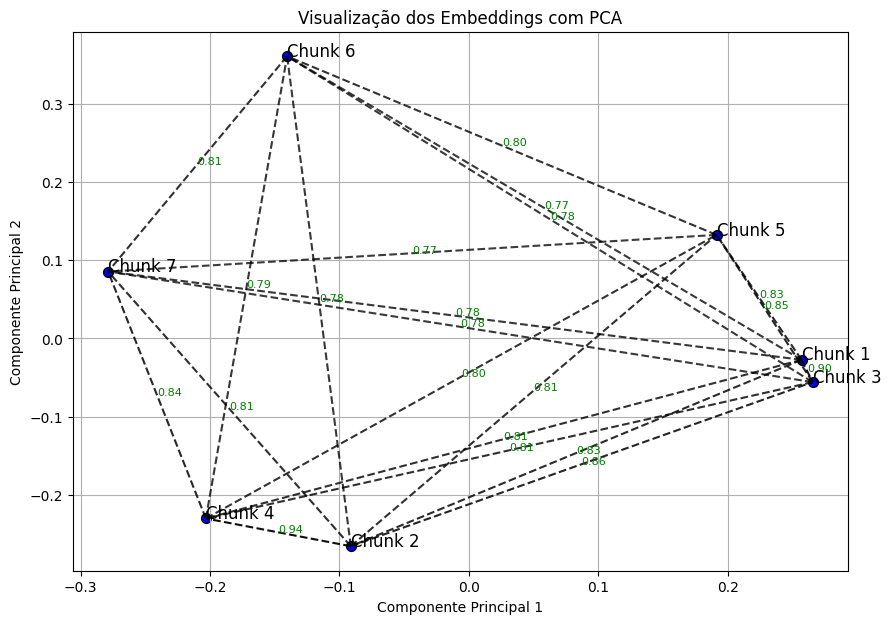

In [49]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)
for i, chunk in enumerate(chunks):
    plt.text(pca_result[i, 0], pca_result[i, 1], f'Chunk {i+1}', fontsize=12)
for (i, j, similarity) in similarities:
    plt.plot([pca_result[i, 0], pca_result[j, 0]], [pca_result[i, 1], pca_result[j, 1]], 'k--', alpha=similarity)
    mid_x = (pca_result[i, 0] + pca_result[j, 0]) / 2
    mid_y = (pca_result[i, 1] + pca_result[j, 1]) / 2
    plt.text(mid_x, mid_y, f'{similarity:.2f}', fontsize=8, color='green')
plt.title('Visualização dos Embeddings com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [50]:
tsne = TSNE(n_components=2, perplexity=2, max_iter=300)
tsne_result = tsne.fit_transform(embedded_chunks_array)

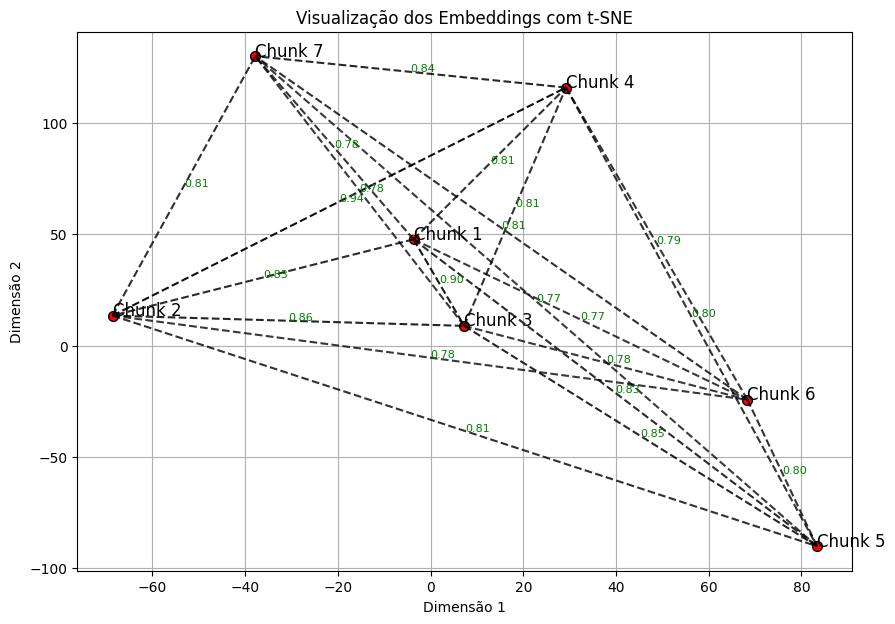

In [51]:
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', edgecolor='k', s=50)
for i, chunk in enumerate(chunks):
    plt.text(tsne_result[i, 0], tsne_result[i, 1], f'Chunk {i+1}', fontsize=12)
for (i, j, similarity) in similarities:
    plt.plot([tsne_result[i, 0], tsne_result[j, 0]], [tsne_result[i, 1], tsne_result[j, 1]], 'k--', alpha=similarity)
    mid_x = (tsne_result[i, 0] + tsne_result[j, 0]) / 2
    mid_y = (tsne_result[i, 1] + tsne_result[j, 1]) / 2
    plt.text(mid_x, mid_y, f'{similarity:.2f}', fontsize=8, color='green')
plt.title('Visualização dos Embeddings com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.grid(True)
plt.show()